#Simple CNN

##1)-Library Importing

In [1]:
# CNN processing libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

# Visualization Libraries
import numpy as np
import matplotlib.pyplot as plt

##2)-Loading dataset Fashion MNIST

In [2]:
# Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

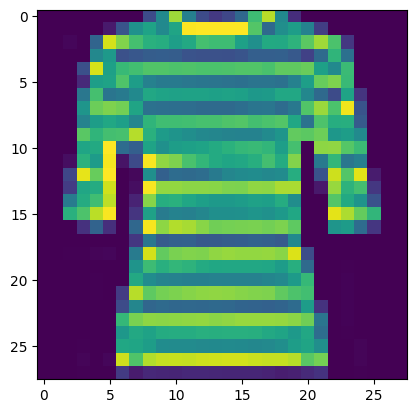

In [4]:
plt.imshow(train_images[26])

In [5]:
train_labels[1:5]

array([0, 0, 3, 0], dtype=uint8)

##3)-Data Cleaning

In [6]:
# Conversion of matrix data into float32 with normalization
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape of dimensions (60000,28,28,1), where the 1 stands for "one channel"
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# We transform the train and test labels to categorial data from 1 to 10 to a one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [7]:
train_labels[1:4]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

##4)-CNN model

In [8]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

###4.1-CNN model compilation

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

###4.2-CNN model train

In [10]:
model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10)

Epoch 1/10
938/938 [==============================] - 15s 5ms/step - loss: 0.5884 - accuracy: 0.7847
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3988 - accuracy: 0.8555
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3589 - accuracy: 0.8702
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3341 - accuracy: 0.8795
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3195 - accuracy: 0.8851
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3093 - accuracy: 0.8896
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3022 - accuracy: 0.8920
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3004 - accuracy: 0.8922
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2944 - accuracy: 0.8959
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2940 - accuracy: 0.895

##5)-Results and evaluation

In [11]:
score = model.evaluate(test_images, test_labels, verbose=0)
score

[0.2736079692840576, 0.9083999991416931]

###5.1-Callbacks

In [12]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=1)
model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks=[early],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2916 - accuracy: 0.8976
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2909 - accuracy: 0.8978
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2871 - accuracy: 0.8987
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2868 - accuracy: 0.8998
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2834 - accuracy: 0.9008
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2844 - accuracy: 0.9010
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2806 - accuracy: 0.9016
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2775 - accuracy: 0.9032
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2792 - accuracy: 0.9031


In [13]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                verbose=1,
                                  monitor='accuracy',
                                  save_best_only=True)
model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks=[checkpoint],
         epochs=10)

Epoch 1/10
938/938 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.9027
Epoch 1: accuracy improved from -inf to 0.90272, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 4s 5ms/step - loss: 0.2764 - accuracy: 0.9027
Epoch 2/10
932/938 [============================>.] - ETA: 0s - loss: 0.2770 - accuracy: 0.9029
Epoch 2: accuracy improved from 0.90272 to 0.90277, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 4s 5ms/step - loss: 0.2769 - accuracy: 0.9028
Epoch 3/10
927/938 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.9023
Epoch 3: accuracy did not improve from 0.90277
938/938 [==============================] - 5s 5ms/step - loss: 0.2794 - accuracy: 0.9025
Epoch 4/10
927/938 [============================>.] - ETA: 0s - loss: 0.2767 - accuracy: 0.9022
Epoch 4: accuracy did not improve from 0.90277
938/938 [==============================] - 4s 5ms/step - loss: 0.2764 - ac

In [14]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')

In [15]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.9069


[0.33555641770362854, 0.9068999886512756]